In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
netflix_data = pd.read_csv(filename)
print("Data loaded successfully.")

Saving netflix_titles.csv to netflix_titles (1).csv
Data loaded successfully.


In [7]:
print("Dataset shape:", netflix_data.shape)
print("Columns available:", list(netflix_data.columns))
print(netflix_data.head(3))

Dataset shape: (8807, 12)
Columns available: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
  show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   

                                           listed_in  \


In [8]:
print(netflix_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [9]:
null_counts = netflix_data.isnull().sum()
print("Missing values:\n", null_counts)

Missing values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


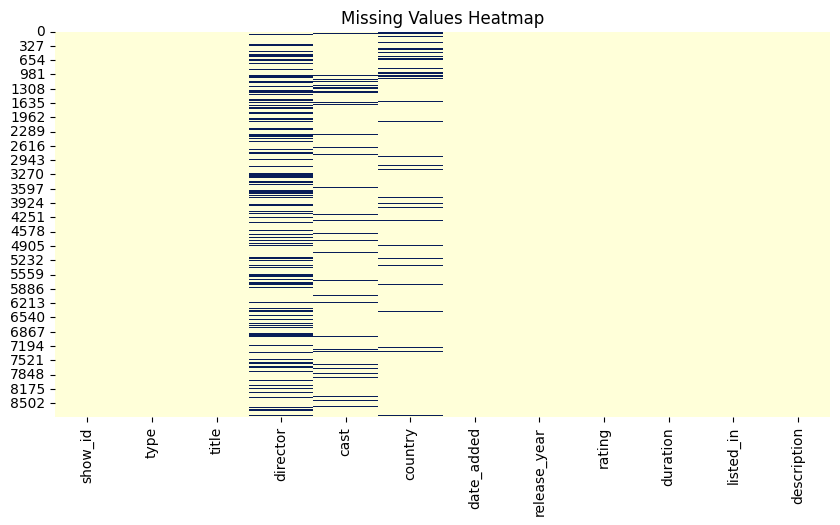

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(netflix_data.isnull(), cmap="YlGnBu", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [11]:
most_common_rating = netflix_data['rating'].mode()[0]
netflix_data['rating'].fillna(most_common_rating, inplace=True)

/tmp/ipython-input-11-460077678.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['rating'].fillna(most_common_rating, inplace=True)


In [12]:
netflix_data['country'].fillna("Not Specified", inplace=True)

/tmp/ipython-input-12-871699927.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['country'].fillna("Not Specified", inplace=True)


In [15]:
netflix_data.dropna(subset=['date_added'], inplace=True)
print("After handling missing data:\n", netflix_data.isnull().sum())

After handling missing data:
 show_id            0
type               0
title              0
director        2624
cast             825
country            0
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64


In [16]:
duplicates = netflix_data.duplicated().sum()
print("Duplicate rows found:", duplicates)

Duplicate rows found: 0


In [17]:
netflix_data = netflix_data.drop_duplicates()
print("Data shape after removing duplicates:", netflix_data.shape)

Data shape after removing duplicates: (8797, 12)


In [24]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'],format='mixed')
netflix_data['year_added'] = netflix_data['date_added'].dt.year

In [25]:
netflix_data['type_code'] = netflix_data['type'].map({'Movie':1, 'TV Show':0})
netflix_data['title_length'] = np.where(netflix_data['title'].notnull(), netflix_data['title'].apply(len), 0)

In [26]:
recent_shows = netflix_data[(netflix_data['type']=='Movie') & (netflix_data['year_added'] > 2016)]
print("Recent movies sample:\n", recent_shows[['title', 'year_added']].head())

Recent movies sample:
                                title  year_added
0               Dick Johnson Is Dead        2021
6   My Little Pony: A New Generation        2021
7                            Sankofa        2021
9                       The Starling        2021
12                      Je Suis Karl        2021


In [27]:
titles_sorted = netflix_data.sort_values(by='title_length', ascending=False)
print("Top longest titles:\n", titles_sorted[['title', 'title_length']].head())

Top longest titles:
                                                   title  title_length
5164  Jim & Andy: The Great Beyond - Featuring a Ver...           104
2813  Ken Burns Presents: College Behind Bars: A Fil...            93
8462  The Power of Grayskull: The Definitive History...            88
3240  Mike Birbiglia: What I Should Have Said Was No...            88
4851  Steve Martin and Martin Short: An Evening You ...            83


In [28]:
country_summary = netflix_data.groupby('country').size().sort_values(ascending=False)
print("Number of titles by country:\n", country_summary.head())

Number of titles by country:
 country
United States     2812
India              972
Not Specified      830
United Kingdom     418
Japan              244
dtype: int64


In [29]:
print("Summary statistics:\n", netflix_data.describe(include='all'))

Summary statistics:
        show_id   type   title       director                cast  \
count     8797   8797    8797           6173                7972   
unique    8797      2    8797           4528                7682   
top      s8807  Movie  Zubaan  Rajiv Chilaka  David Attenborough   
freq         1   6131       1             19                  19   
mean       NaN    NaN     NaN            NaN                 NaN   
min        NaN    NaN     NaN            NaN                 NaN   
25%        NaN    NaN     NaN            NaN                 NaN   
50%        NaN    NaN     NaN            NaN                 NaN   
75%        NaN    NaN     NaN            NaN                 NaN   
max        NaN    NaN     NaN            NaN                 NaN   
std        NaN    NaN     NaN            NaN                 NaN   

              country                     date_added  release_year rating  \
count            8797                           8797   8797.000000   8797   
unique  

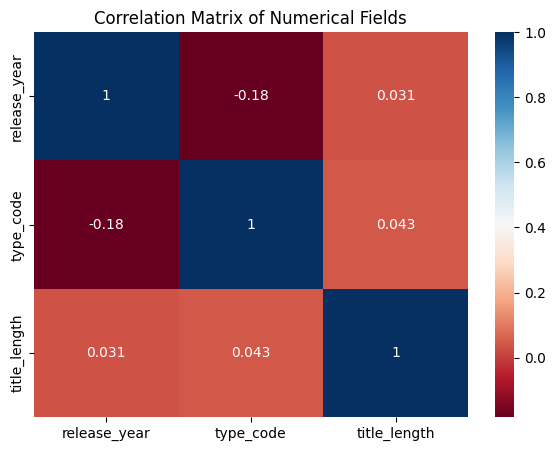

In [31]:
plt.figure(figsize=(7,5))
sns.heatmap(netflix_data.select_dtypes(include=['float64','int64']).corr(), annot=True, cmap="RdBu")
plt.title("Correlation Matrix of Numerical Fields")
plt.show()